[<img align="left" width="140px" src="https://storage.googleapis.com/static.drivetrainhub.com/img/dh_logo_text_217x80.png"/>](https://www.drivetrainhub.com)

<div align="right">© 2019 Drivetrain Hub LLC</div>

# Rotational Mechanics / Math Primer
---

**Authors**:  [Chad Glinsky](https://github.com/glinskyc)

**Description**:  Mathematics primer for drivetrain engineering rotational mechanics in three-dimensional Euclidean space.

## Table of Contents

1. [Introduction](#Introduction)
    1. [Nomenclature](#Nomenclature)
1. [Point](#Point)
    1. [Distance](#Distance)
1. [Vector](#Vector)
    1. [Addition](#Addition)
    1. [Dot Product](#Dot-Product)
    1. [Cross Product](#Cross-Product)
1. [Periodic Signal](#Periodic-Signal)
    1. [Waveform](#Waveform)
    1. [Euler's Formula](#Euler's-Formula)
    1. [Harmonic Analysis](#Harmonic-Analysis)
1. [Linear Algebra](#Linear-Algebra)
    1. [System of Equations](#System-of-Equations)
    1. [Rotation Matrix](#Rotation-Matrix)
1. [References](#References)

#### Notebook imports and settings

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi, cos, sin, acos, degrees, isclose
import numpy as np
import pandas as pd

# notebook modules
import math_primer as mp

# settings
plt.rcParams.update({'font.size': 13})  # set default font size

In [2]:
# DEVELOPMENT USE: %autoreload 1
# PRODUCTION USE: %autoreload 0
%load_ext autoreload
%autoreload 0
%aimport math_primer

$\LaTeX$ commands
$\newcommand{\x}{\hat{i}}$
$\newcommand{\y}{\hat{j}}$
$\newcommand{\z}{\hat{k}}$
$\newcommand{\deg}{^\circ}$
$\newcommand{\diff}{\,\mathrm{d}}$

## Introduction

This notebook provides an introduction to the concepts and mathematics commonly encountered in rotational mechanics, an important subject matter in drivetrain engineering.  This includes review of vectors, periodic signals, linear systems, rotational matrices, and more.  Each section includes at least one example.

This notebook has two main objectives:  
1. Educate the reader about key mathematics required in the study of rotational systems, such as a drivetrain.
2. Reduce the content and avoid repeated content in the other notebooks of the [Drivetrain Hub | Notebook Series](https://www.drivetrainhub.com/code/notebooks).

### Nomenclature

<table style="margin-left: 0">
    <tr>
        <th>Symbol</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">$X$</td>
        <td style="text-align:left">Cartesian global x-coordinate</td>
    </tr>
    <tr>
        <td style="text-align:left">$Y$</td>
        <td style="text-align:left">Cartesian global y-coordinate</td>
    </tr>
    <tr>
        <td style="text-align:left">$Z$</td>
        <td style="text-align:left">Cartesian global z-coordinate</td>
    </tr>
    <tr>
        <td style="text-align:left">$x$</td>
        <td style="text-align:left">Cartesian x-coordinate</td>
    </tr>
    <tr>
        <td style="text-align:left">$y$</td>
        <td style="text-align:left">Cartesian y-coordinate</td>
    </tr>
    <tr>
        <td style="text-align:left">$z$</td>
        <td style="text-align:left">Cartesian z-coordinate</td>
    </tr>
    <tr>
        <td style="text-align:left">$\x$</td>
        <td style="text-align:left">Cartesian x-axis unit vector</td>
    </tr>
    <tr>
        <td style="text-align:left">$\y$</td>
        <td style="text-align:left">Cartesian y-axis unit vector</td>
    </tr>
    <tr>
        <td style="text-align:left">$\z$</td>
        <td style="text-align:left">Cartesian z-axis unit vector</td>
    </tr>
    <tr>
        <td style="text-align:left">$r$</td>
        <td style="text-align:left">Radius</td>
    </tr>
    <tr>
        <td style="text-align:left">$\theta$</td>
        <td style="text-align:left">Angle of rotation</td>
    </tr>
    <tr>
        <td style="text-align:left">$v$</td>
        <td style="text-align:left">Linear velocity</td>
    </tr>
    <tr>
        <td style="text-align:left">$\omega$</td>
        <td style="text-align:left">Angular velocity</td>
    </tr>
    <tr>
        <td style="text-align:left">$M$</td>
        <td style="text-align:left">Moment</td>
    </tr>
    <tr>
        <td style="text-align:left">$\tau$</td>
        <td style="text-align:left">Torque</td>
    </tr>
    <tr>
        <td style="text-align:left">$i$</td>
        <td style="text-align:left">Imaginary number</td>
    </tr>
    <tr>
        <td style="text-align:left">$a_{ij}$</td>
        <td style="text-align:left">Linear equation coefficient</td>
    </tr>
    <tr>
        <td style="text-align:left">$x$</td>
        <td style="text-align:left">Linear equation variable</td>
    </tr>
    <tr>
        <td style="text-align:left">$b$</td>
        <td style="text-align:left">Linear equation constant</td>
    </tr>
    <tr>
        <td style="text-align:left">$A$</td>
        <td style="text-align:left">Coefficients matrix</td>
    </tr>
    <tr>
        <td style="text-align:left">$R$</td>
        <td style="text-align:left">Rotation matrix</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha$</td>
        <td style="text-align:left">Euler angle about $z$ axis</td>
    </tr>
    <tr>
        <td style="text-align:left">$\beta$</td>
        <td style="text-align:left">Euler angle about $x'$ axis</td>
    </tr>
    <tr>
        <td style="text-align:left">$\gamma$</td>
        <td style="text-align:left">Euler angle about $z''$ axis</td>
    </tr>
</table>

Any symbols combined with a overhead arrow, $\vec{}$, indicates a *vector*, a term with magnitude and direction.  Any symbols with an overhead hat, $\hat{}$, indicates a *unit vector*.  For example, $\vec{v}$ is a linear velocity vector and $\hat{v}$ is the unit vector of velocity.  Any symbols in **bold** indicate a vector 1-D array.  For example, $\pmb{x} = [x_1, x_2, x_3]$, is a variables vector array.

## Point

A point is the simplest form of spatial data, being an infinitesimal entity defined by a set of coordinates in three-dimensional space.  We will use Cartesian coordinate system, but others such as cylindrical and spherical coordinates are common in engineering. 

<img src="./img/drivetrainhub_math_point_3d.svg" alt="Point positioned in three-dimensional space with Cartesian coordinates" style="height: 220px"/>
<p style="text-align: center; font-weight: bold;">Point positioned in three-dimensional space with Cartesian coordinates</p>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    A point does not have an orientation or direction.  It is fully defined by its positional coordinates.
</div>

### Distance

The distance between two points in three-dimensional space is computed by first computing the distance of each axis as:

$$l_x = x_2 - x_1$$
$$l_y = y_2 - y_1$$
$$l_z = z_2 - z_1$$

where $(x_1, y_1, z_1)$ and $(x_2, y_2, z_2)$ are the coordinates of points $\text{P}_1$ and $\text{P}_2$, respectively.  Then apply the Pythagorean theorem to three dimensions to get the total distance between points:

$$l = \sqrt{l_x^2 + l_y^2 + l_z^2}$$

Notice the components of distance can be negative, but the total distance is always a positive value.

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Points</h3>
    <h4>GIVEN</h4>
    Two points in three-dimensional space, defined with Cartesian coordinates.<br>
    <h4>FIND</h4>
    Distance between points, including the distance along each Cartesian axis.<br>
    <h4>SOLUTION</h4>
    See below.
</div>

In [155]:
# GIVEN
# -----
point1 = [0, 1, 0]
point2 = [1, 0, 0]

# SOLUTION
# --------
point1 = np.array(point1)
point2 = np.array(point2)
subtracted = np.subtract(point2, point1)
distance = np.linalg.norm(subtracted)

data = [
    ['Point 1 coordinates', '$\rm{P}_1$', point1],
    ['Point 2 coordinates', '$\rm{P}_2$', point2],
    ['x-distance', '$l_x$', subtracted[0]],
    ['y-distance', '$l_y$', subtracted[1]],
    ['z-distance', '$l_z$', subtracted[2]],
    ['Total distance', '$l$', distance]
]
cols = ['Description', 'Symbol', 'Value']
mp.df_display(data, cols)

Description,Symbol,Value
Point 1 coordinates,$\rm{P}_1$,"[0, 1, 0]"
Point 2 coordinates,$\rm{P}_2$,"[1, 0, 0]"
x-distance,$l_x$,1
y-distance,$l_y$,-1
z-distance,$l_z$,0
Total distance,$l$,1.41421


## Vector

Vectors are used extensively in the mathematical modeling of physical systems.  A vector is an entity with a *magnitude* and *direction*.  This can be illustrated with an arrow (direction) of a specified length (magnitude).  Magnitude is also referred to as *amplitude*.

<img src="./img/drivetrainhub_math_vector.svg" alt="Vector of magnitude and direction" style="height: 60px"/>
<p style="text-align: center; font-weight: bold;">Vector of magnitude and direction</p>

The magnitude of a time-invariant vector can be defined with a single scalar value.  The direction of a time-invariant vector can be defined in different ways, depending on the domain.  Since rotational mechanics pertains to the study of physical systems in three-dimensional space, the vector direction is commonly defined with components of Cartesian coordinates.

$$\vec{a} = a_x\x + a_y\y + a_z\z$$

where $\x, \y, \z$ are unit vectors corresponding to the Cartesian axes.  A vector in three-dimensions can be visualized relative to Cartesian axes as:

<img src="./img/drivetrainhub_math_vector_cartesian.svg" alt="Vector in Cartesian coordinate system" style="height: 220px"/>
<p style="text-align: center; font-weight: bold;">Vector in a Cartesian coordinate system</p>

A *unit vector* is a vector of unit (1.0) amplitude, expressed for $\vec{a}$ as:

$$\hat{a} = \frac{\vec{a}}{\|\vec{a}\|} = \frac{a_x}{a}\x + \frac{a_y}{a}\y + \frac{a_z}{a}\z$$

where $\|\vec{a}\|$, also notated as $a$, is the magnitude of $\vec{a}$ and calculated as:

$$\|\vec{a}\| = \sqrt{a_x^2 + a_y^2 + a_z^2}$$

For computations, a vector is often represented in array form:

$$\vec{a} = \left[ a_x, a_y, a_z \right]$$

where $a_x, a_y, a_z$ are called *elements* of the array.

### Addition

Vectors can be added and subtracted by applying the math operation *element-wise*.  Element-wise means performing the math operation on the respective elements of each vector.  This becomes apparent when considering vector addition of $\vec{a}$ and $\vec{b}$:

$$\vec{a} + \vec{b} = (a_x + b_x)\x + (a_y + b_y)\y + (a_z + b_z)\z$$

Vector subtraction is performed similarly:

$$\vec{a} - \vec{b} = (a_x - b_x)\x + (a_y - b_y)\y + (a_z - b_z)\z$$

The addition and subtraction of vectors is visualized as:

<img src="./img/drivetrainhub_math_vector_addition.svg" alt="Adding and subtracting vectors" style="height: 130px"/>
<p style="text-align: center; font-weight: bold;">Adding and subtracting vectors</p>

### Dot Product

The dot product is a scalar resulting from the product of the magnitude of two vectors and the cosine of the angle, $\theta$, between the vectors.  It is also referred to as the *scalar product* and *inner product*.  Its geometric definition results in the equation:

$$\vec{a} \cdot \vec{b} = a b \cos\theta$$

where $\cdot$ denotes the dot product.  The geometric relationship of a dot product is illustrated below, noting that any two vectors in three-dimensional space lie within an arbitrary plane intersecting both vectors. 

<img src="./img/drivetrainhub_math_dot_product.svg" alt="Dot product geometric relationship of two vectors" style="height: 130px"/>
<p style="text-align: center; font-weight: bold;">Dot product geometric relationship</p>

In the case of a dot product with a unit vector, the component of a vector in a given direction, per the unit vector, can be calculated.

$$\vec{a} \cdot \hat{b} = a \cos\theta$$

This *vector projection* calculation is made clear in the figure below.

<img src="./img/drivetrainhub_math_vector_projection.svg" alt="Vector projection via dot product with a unit vector" style="height: 200px"/>
<p style="text-align: center; font-weight: bold;">Vector projection from a dot product</p>

The dot product can also be calculated algebraically in Cartesian component form as the sum of element-wise products:

$$\vec{a} \cdot \vec{b} = a_x b_x + a_y b_y + a_z b_z$$

Common applications of the dot product include:

1. Calculate the component of geometry or velocity in a certain direction.
1. Calculate the angle between two vectors.
1. Calculate if two spatial objects are parallel or perpendicular.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Special cases of the dot product:</b>
    <br>
    <ol>
        <li>The dot product of two parallel vectors is equal to the scalar product of the two vector magnitudes.</li>
        <li>The dot product of two orthogonal vectors is always zero.</li>
    </ol>
</div>

### Cross Product

The cross product is a vector that is orthogonal to the plane containing the two formulating vectors.  It is also referred to as the *vector product*.

<img src="./img/drivetrainhub_math_cross_product.svg" alt="Cross product of two vectors" style="height: 190px"/>
<p style="text-align: center; font-weight: bold;">Cross product of two vectors</p>

where $\vec{a} \times \vec{b}$ is the cross product.  Direction of the cross product is determined by the right-hand rule, and its magnitude is calculated as:

$$\|\vec{c}\| = \|\vec{a}\| \|\vec{b}\| \sin\theta$$

The cross product can also be calculated algebraically in Cartesian component form as:

$$\vec{c} = \vec{a} \times \vec{b} = (a_y b_z - a_z b_y)\x - (a_x b_z - a_z b_x)\y + (a_x b_y - a_y b_x)\z$$

Common applications of the cross product include:

1. Calculate linear velocity of a point in 3-dimensional space on a rotating body:  $\vec{v} = \vec{\omega} \times \vec{r}$
2. Calculate moment about a point in 3-dimensional space due to a force at a distance:  $\vec{M} = \vec{r} \times \vec{F}$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Special cases of the cross product:</b>
    <br>
    <ol>
        <li>The cross product of two parallel vectors is always zero.</li>
        <li>The cross product of two orthogonal vectors has a magnitude equal to the scalar product of the two vector magnitudes.</li>
    </ol>
</div>

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Vectors</h3>
    <h4>GIVEN</h4>
    Two vectors in three-dimensional space oriented at an angle relative to each other.
    <h4>FIND</h4>
    1) Addition of vectors.<br>
    2) Subtraction of vectors.<br>
    3) Dot product of vectors.<br>
    4) Cross product of vectors.<br>
    5) Angle between vectors.  Are the vectors parallel, perpendicular, or neither?
    <h4>SOLUTION</h4>
    See below.
</div>

In [156]:
# GIVEN
# -----
a = [2, 0, 0]
b = [0, 1, 0]

# SOLUTION
# --------
summed = np.add(a, b)
subtracted = np.subtract(a, b)

dot_product = np.dot(a, b)
cross_product = np.cross(a, b)

a_magnitude = mp.vector_magnitude(*a)
b_magnitude = mp.vector_magnitude(*b)
theta = acos(dot_product / (a_magnitude * b_magnitude))

is_parallel = isclose(mp.vector_magnitude(*cross_product), 0)
is_perpendicular = isclose(dot_product, 0)

data = [
    ['Vector $a$', '$\\vec{a}$', a],
    ['Vector $b$', '$\\vec{b}$', b],
    ['Addition', '$\\vec{a} + \\vec{b}$', summed],
    ['Subtraction', '$\\vec{a} - \\vec{b}$', subtracted],
    ['Dot product', '$\\vec{a} \\cdot \\vec{b}$', dot_product],
    ['Cross product', '$\\vec{a} \\times \\vec{b}$', cross_product],
    ['Angle', '$\\theta$', f'{round(degrees(theta), 3)}$\\deg$'],
    ['Is parallel?', '$\\parallel$', is_parallel],
    ['Is perpendicular?', '$\\bot$', is_perpendicular],
]
cols = ['Description', 'Symbol', 'Value']
mp.df_display(data, cols)

Description,Symbol,Value
Vector $a$,$\vec{a}$,"[2, 0, 0]"
Vector $b$,$\vec{b}$,"[0, 1, 0]"
Addition,$\vec{a} + \vec{b}$,"[2, 1, 0]"
Subtraction,$\vec{a} - \vec{b}$,"[2, -1, 0]"
Dot product,$\vec{a} \cdot \vec{b}$,0
Cross product,$\vec{a} \times \vec{b}$,"[0, 0, 2]"
Angle,$\theta$,90.0$\deg$
Is parallel?,$\parallel$,False
Is perpendicular?,$\bot$,True


## Periodic Signal

In rotational mechanics, periodic signals are frequently encountered since rotation is a periodic motion, repeating every $2\pi$ radians or $360\deg$.  This is illustrated below for a shaft rotating at an angular velocity.

<img src="./img/drivetrainhub_math_periodic_shaft.svg" alt="Periodic motion of a rotating shaft" style="height: 175px"/>
<p style="text-align: center; font-weight: bold;">Periodic motion of a rotating shaft</p>

From the figure, it is obvious that a *period* is one rotation of the shaft, $2\pi$ radians.  As a function of time, the period depends on angular velocity:

$$T = \frac{2\pi}{\omega}$$

where units are seconds.  Therefore, the frequency in cycles per second (Hz) is calculated as the inverse of period:

$$f = \frac{1}{T} = \frac{\omega}{2\pi}$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>A periodic signal is any signal that varies with time and eventually repeats itself.</b>
    <br><br>
    Later, it is shown how certain periodic signals can be described from a combination of other periodic signals. 
</div>

### Waveform

A common method to describe and illustrate periodic signals is by a *waveform*, sometimes called a *time series waveform*.  Waveforms represent signals as a function of time or some other independent variable that relates to time, such as rotation angle in the case of a rotating object.

A sinusoid is a periodic signal with a continuous waveform, as illustrated below.

<img src="./img/drivetrainhub_math_sinusoidal_waveform.svg" alt="Waveform of periodic signal" style="height: 230px"/>
<p style="text-align: center; font-weight: bold;">Sinusoidal waveform</p>

Mathematically, the waveform above can be defined by a sine function:

$$y(x) = a \sin(\omega x + \phi)$$

where independent variable, $x$, is usually time.  The cosine function can also be used since it is equal to the sine function with a phase shift:

$$\cos(x) = \sin(x + \pi / 2)$$

Graphically, sine and cosine functions are compared below for $\omega=1$.

<img src="./img/drivetrainhub_math_sine_and_cosine.svg" alt="Comparison of sine and cosine functions" style="height: 200px"/>
<p style="text-align: center; font-weight: bold;">Comparison of sine and cosine functions</p>

Notice the phase shift results in sine *lagging* cosine by $\pi/2$, or cosine *leading* sine by $\pi/2$.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Sinusoids are the foundation of periodic signals and can be used to describe non-sinusoidal functions.</b>
    <br><br>
    Later, it is shown how the Fourier transform is used with sinusoids to approximate any periodic signal. 
</div>

### Euler's Formula

Euler's formula is useful for simplifying the mathematical representation and interpretation of complex functions.  In its simplest form, it is expressed as:

$$e^{i\phi} = \cos\phi + i\sin\phi$$

where $e^{i\phi}$ is a unit complex number. It is easiest to understand the formula by illustrating it as a vector in the complex plane with a unit circle:

<img src="./img/drivetrainhub_math_euler_formula.svg" alt="Euler formula in complex plane" style="height: 280px"/>
<p style="text-align: center; font-weight: bold;">Euler formula in complex plane</p>

where it can be seen how a complex number relates to Euler's formula as:

$$x + iy = r \left( \cos\phi + i\sin\phi \right) = r e^{i\phi}$$

where $r=1$ in the figure above, calculated as $r = \sqrt{x^2 + y^2}$.  A more useful form of Euler's formula for our purpose is to express it as a function of time as:

$$r e^{i (\omega t + \phi)} = r \left( \cos(\omega t + \phi) + i\sin(\omega t + \phi) \right)$$

where $r$ is the complex vector *magnitude*, $\omega$ is *angular frequency*, and $\phi$ is *phase angle*.  This formula allows a *rotating vector* to be expressed with simple mathematical notation.  This means Euler's formula can be used to represent periodic signals.  The relationship between a rotating complex vector and a time-series waveform is illustrated below.  Note the complex plane axes are rotated for illustration purposes.

<img src="./img/drivetrainhub_math_euler_formula_waveform.svg" alt="Euler formula waveform" style="height: 300px"/>
<p style="text-align: center; font-weight: bold;">Rotating complex vector and its waveform signal</p>

where the real part of the rotating complex vector equals the cosine function and hence represents the time-series waveform of a physical signal.

#### Math Operations

Euler's formula is particularly useful for performing mathematical operations of periodic signals.  For example, $N$ periodic signals of the same frequency can be represented in time-independent form to easily calculate their summation as:

$$r e^{i\phi} = \sum_{n=1}^N r_n e^{i \phi_n}$$

where the magnitude and phase of the summed signal is easily calculated from the resulting complex number, $x + iy$:

$$r = \sqrt{x^2 + y^2}$$

$$\phi = \tan^{-1}\left(\frac{y}{x}\right)$$

Similarly, two periodic signals in Euler form can be multiplied to produce a modulated signal:

$$r_1 e^{i (\omega_1 t + \phi_1)} r_2 e^{i (\omega_2 t + \phi_2)} = r_1 r_2 e^{i ((\omega_1 + \omega_2)t + \phi_1 + \phi_2)}$$

where the resulting signal amplitude is $r_1 r_2$, angular frequency is $\omega_1 + \omega_2$, and phase angle is $\phi_1 + \phi_2$.

### Harmonic Analysis

Harmonic analysis is a vast topic, applicable to a broad range of mathematics and engineering.  The narrow scope reviewed here is:

1. Define periodic signals as a sequence of sinusoidal functions.
2. Determine the frequency content of a time-series signal.

A *harmonic* is a positive integer multiple of a fundamental frequency.  In physical terms, the fundamental frequency is the first natural frequency of vibration for an elastic object.  Therefore, the first harmonic is the fundamental frequency, the second harmonic is twice the fundamental frequency, and so on.

Harmonics refer to sinusoidal signals with amplitude, frequency, and phase angle.  The frequency of the $n^\rm{th}$ harmonic is calculated as:

$$f_n = n f_0$$

where $f_0$ is the fundamental frequency.

#### Fourier Series

Fourier series can be used to construct a function, $s(x)$, from a series of weighted harmonics.  It is mathematically defined as:

$$s_N(x) = \frac{a_0}{2} + \sum_{n=1}^{N} \left( a_n \cos\left(\frac{2 \pi n x}{P}\right) + b_n \sin\left(\frac{2\pi n x}{P}\right) \right)$$

where $N$ is the number of *harmonics*, $P$ is the period of the Fourier series, and coefficients are calculated as:

$$a_n = \frac{2}{P} \int_P s(x) \cos\left(\frac{2 \pi n x}{P}\right) \diff x$$

$$b_n = \frac{2}{P} \int_P s(x) \sin\left(\frac{2 \pi n x}{P}\right) \diff x$$

where $s(x)$ must be integrable over $P$, and $a_0$ evaluates as:

$$a_0 = \frac{2}{P} \int_P s(x) \diff x$$

Harmonic and period are related in that the $n^\rm{th}$ harmonic has $n$ cycles over the period $P$.  

##### Square Wave

As an example of how the Fourier series works, consider the square wave.  A square wave function is written as:

$$s(x) = 
\begin{cases}
    A & \text{for } 0 \leq x \lt d T\\
    0 & \text{for } d T \leq x \lt T 
\end{cases}$$

where $A$ is amplitude, $T$ is period, and $d$ is the fraction of the period spent at the amplitude.  The Fourier series coefficients of a square wave evaluate to:

$$a_0 = 2 A d$$

$$a_n = \frac{A \sin(2 \pi n d)}{\pi n}$$

$$b_n = \frac{2 A \sin^2(\pi n d)}{\pi n}$$

Below is a plot comparing the square wave Fourier series with different harmonics.  Notice the even numbered harmonics ($n = 2, 4, 6, \dots$) do not contribute to the Fourier series of a square wave.  That is why the plots of $N=3$ and $N=4$ are identical.

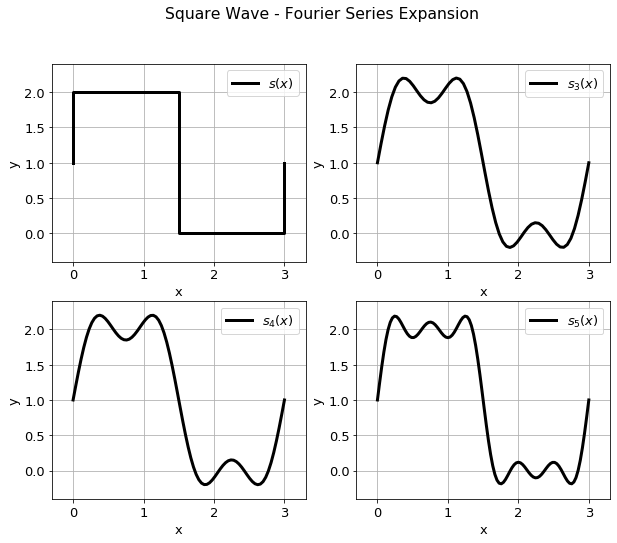

In [157]:
# INPUTS
# ------
amplitude = 2
period = 3
duty_cycle = 0.5
n_harmonics1 = 3
n_harmonics2 = 4
n_harmonics3 = 5

# OUTPUTS
# -------
harmonics = [n_harmonics1, n_harmonics2, n_harmonics3]

# create figure and axes
fig = plt.figure(figsize=[10, 8])

for i, n in enumerate([0] + harmonics) :
    ax = fig.add_subplot(2, 2, i+1)
    
    if i == 0:
        # plot nominal square wave
        x = [0, 0, duty_cycle * period, duty_cycle * period, period, period]
        y = [amplitude / 2] + [amplitude] * 2 + [0] * 2 + [amplitude / 2]
        ax.plot(x, y, 'k', linewidth=3, label='$s(x)$')
    else:
        # plot Fourier series
        x, y = mp.fourier_series_square_wave(amplitude, period, duty_cycle, n)
        ax.plot(x, y, 'k', linewidth=3, label=f'$s_{{{n}}}(x)$')
        
    # format plot
    dx = 0.1 * period
    dy = 0.2 * amplitude
    plt.xlim([-dx, period + dx])
    plt.ylim([-dy, amplitude + dy])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.suptitle('Square Wave - Fourier Series Expansion')

plt.show()

#### Fourier Transform

To identify the harmonics of a *time-domain* signal, the Fourier transform is used, defined as:

$$\hat{f}(\omega) = \int_{-\infty}^{\infty} f(x)\, e^{-i \omega x} \diff x$$

where $\omega$ is angular frequency.  Therefore, this equation expresses the signal in the *frequency-domain*, allowing for identification of its frequency content.  When signals that vary with time are measured, Fourier analysis is useful to interpret their waveforms and quantify the frequencies of its variations.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Fast Fourier Transform (FFT) is a technique for calculating the discrete Fourier Transform, and is widely implemented on modern computers.</b>
    <br><br>
    Since physical measurements and computers handle data as discrete samples, the discrete Fourier Transform and FFT is particularly useful for computational analysis.
</div>

Below is a plot of the FFT computed for the Fourier series of a square wave to identify its harmonics. 

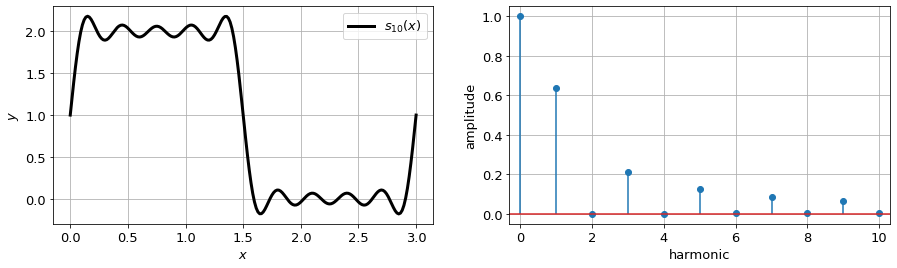

In [158]:
# INPUTS
# ------
amplitude = 2
period = 3
duty_cycle = 0.5
n_harmonics = 10

# OUTPUTS
# -------
# create figure
fig = plt.figure(figsize=[15, 4])

# plot square wave Fourier series
ax = fig.add_subplot(1, 2, 1)
x, y = mp.fourier_series_square_wave(amplitude, period, duty_cycle, n_harmonics)
ax.plot(x, y, 'k', linewidth=3, label=f'$s_{{{n_harmonics}}}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()

# calculate FFT
ns = len(x)
dt = x[1] - x[0]
sp = np.fft.fft(y)
amplitudes = np.abs(sp) / ns  # normalized by `ns` for accurate amplitudes
phases = np.angle(sp)
freq = np.fft.fftfreq(ns, d=dt)
n_periods = 1
orders = freq / (freq[1] * n_periods)

# index amplitudes above a specified threshold
i_keep = np.where(np.logical_and(amplitudes > 0.01 * max(amplitudes), orders >= 0))

# plot FFT
ax = fig.add_subplot(1, 2, 2)
ax.stem(orders, amplitudes, use_line_collection=True)
plt.xlim([-.3, n_harmonics + 0.3])
plt.xlabel('harmonic')

# alternatively use frequency
# ax.stem(freq, amplitudes, use_line_collection=True)
# plt.xlim([-.3, max(freq[i_keep]) + 0.3])
# plt.xlabel('frequency')

plt.ylabel('amplitude')
plt.grid()
plt.show()

#### Orders

For completeness, the *order* of a periodic signal is explained.  Order does not have anything in particular to do with Fourier analysis, but it is a term frequently used when analyzing periodic signals.  An order defines the frequency of a signal *relative* to the frequency of another signal.

<img src="./img/drivetrainhub_math_frequency_order.svg" alt="Rotating shaft with four cogs" style="height: 200px"/>
<p style="text-align: center; font-weight: bold;">Rotating shaft with four cogs</p>

In the illustration above, the shaft rotates at a certain speed and the four (4) cogs attached to it rotate at the same speed.  However, if we consider frequency of the cogs from an observer watching the shaft rotate, they will see four cogs pass for each rotation of the shaft.  Thus, the cog pass-frequency is 4x the shaft frequency.  If the shaft is defined as the reference, then it has order 1.0 and the cogs have order 4.0.  This is true regardless of rotational speed.

Mathematically, we can define a signal's order as a function of its frequency relative to a *reference freqency*:

$$\text{order} = \frac{f}{f_\text{ref}}$$

Despite looking similar to the definition of harmonics, orders are not required to be integer multiples and any frequency can be used as a reference frequency.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>It is important to distinguish between frequency, angular frequency, harmonic, and order when discussing periodic signals.</b>
    <br><br>
    Here are definitions for each to help distinguish them:
    <ul>
        <li>Frequency is the inverse of the signal period, with units of cycles per second $\left(\rm{Hz}\right)$.</li>
        <li>Angular frequency is the frequency of a rotation, $2\pi$ multiple of frequency with units of radians per second $\left(\rm{rad}/\rm{s}\right)$.</li>
        <li>Harmonic is an integer multiple of a frequency relative to a fundamental frequency.</li>
        <li>Order is a multiple or fraction of a frequency relative to a chosen reference frequency.</li>
    </ul>
</div>

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Periodic Signals</h3>
    <h4>GIVEN</h4>
    Two higher frequency periodic signals, of the same frequency, and one lower frequency periodic signal.
    <h4>FIND</h4>    
    1) Euler formula of each signal.<br>
    2) Sum of signals with the same frequency.<br>
    3) Product of low frequency signal and summed signal in (2).<br>
    4) Plot waveforms of all signals, including results (2) and (3).<br>
    5) Plot FFT of results (2) and (3).
    <h4>SOLUTION</h4>
    See below.
</div>

Euler equations for signals s1, s2, s3:


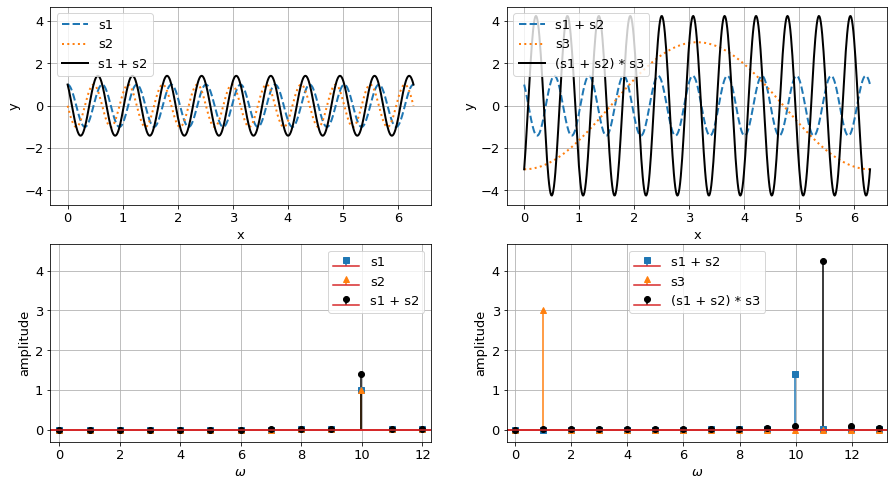

In [167]:
# GIVEN
# -----
# signal 1
amplitude1 = 1
omega1 = 10
phi1 = 0

# signal 2
amplitude2 = amplitude1
omega2 = omega1
phi2 = pi/2

# signal 3
amplitude3 = 3
omega3 = 1
phi3 = pi

# SOLUTION
# --------
amplitudes = [amplitude1, amplitude2, amplitude3]
omegas = [omega1, omega2, omega3]
phis = [phi1, phi2, phi3]

# time
periods = [2 * pi / omega for omega in omegas]
x = np.linspace(0, max(periods), num=50 * max(omegas))

# signal functions, s(x)
s1 = mp.euler_fcn(amplitude1, omega1, phi1)(x)
s2 = mp.euler_fcn(amplitude2, omega2, phi2)(x)
s3 = mp.euler_fcn(amplitude3, omega3, phi3)(x)

# 1 - display Euler equations
print('Euler equations for signals s1, s2, s3:')
for a, omega, phi in zip(amplitudes, omegas, phis):
    mp.display_euler_eqn(a, omega, phi)
    
# 2 - sum signals of same frequency
summed = s1 + s2

# 3 - product of low frequency signal with summed signal
product = summed * s3

# 4 - plot waveforms
# ------------------
legend_loc = 'upper left'

# create figure and axes
fig = plt.figure(figsize=[15, 8])

# series lists for each subplot
signal_lists = [[s1, s2, summed], [summed, s3, product]]
labels = [['s1', 's2', 's1 + s2'], ['s1 + s2', 's3', '(s1 + s2) * s3']]
linestyles = [['--', ':', 'k-'], ['--', ':', 'k-']]

for i in range(2):
    ax = fig.add_subplot(2, 2, i+1)
    
    # plot each signal in the ith list
    for signal, label, linestyle in zip(signal_lists[i], labels[i], linestyles[i]):
        ax.plot(x, np.real(signal), linestyle, linewidth=2, label=label)

    # format plot
    ymax = max(np.real(product)) * 1.1
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim([-ymax, ymax])
    plt.legend(loc=legend_loc)
    plt.grid()

# 5 - plot FFT of summed and modulated signals
# --------------------------------------------
linestyles = [['C0-', 'C1-', 'k-'], ['C0-', 'C1-', 'k-']]
markerfmts = [['s', '^', 'ko'], ['s', '^', 'ko']]

# FFT params
ns = len(x)
dt = x[1] - x[0]

for i in range(2):
    ax = fig.add_subplot(2, 2, i+3)
    
    # plot each signal in the ith list
    for y, label, linefmt, markerfmt in zip(signal_lists[i], labels[i], linestyles[i], markerfmts[i]):
        # calculate FFTs
        sp = np.fft.fft(y)
        amplitudes = np.abs(sp) / ns  # normalized by `ns` for accurate amplitudes
        phases = np.angle(sp)
        freq = np.fft.fftfreq(ns, d=dt)
        omega_fft = 2 * pi * freq
        n_periods = 1
        orders = freq / (freq[1] * n_periods)

        # index amplitudes above a specified threshold
        i_keep = np.where(np.logical_and(amplitudes > 0.01 * max(amplitudes), orders >= 0))

        # OPTION 1 - fcn of harmonics
        # ax.stem(orders, amplitudes, linefmt, markerfmt, label=label, use_line_collection=True)
        # plt.xlim([-.3, max(orders[i_keep]) + 0.3])
        # plt.xlabel('harmonic')

        # OPTION 2 - fcn of angular frequency
        ax.stem(omega_fft, amplitudes, linefmt, markerfmt, label=label, use_line_collection=True)
        plt.xlim([-.3, max(omega_fft[i_keep]) + 0.3])
        plt.xlabel('$\omega$')

    plt.ylim([min(-.3, .1 * ymax), ymax])
    plt.ylabel('amplitude')
    plt.grid()
    plt.legend()
    
plt.show()

## Linear Algebra

Linear algebra is its own field of study in mathematics, and therefore only a narrow scope is considered here.  The application of linear algebra in rotational mechanics mostly pertains to solving systems of linear equations, and to model the orientation and rotation of physical objects in three-dimensional space.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    As shown in the kinematics notebook, a system of linear equations results from the formulation of angular velocities for rotationally connected bodies.
</div>

### System of Equations

The general form of a single linear equation with $n$-variables is:

$$a_1 x_1 + a_2 x_2 + ... + a_n x_n = b$$

where $x_1, x_2, ..., x_n$ are the variables, $a_1, a_2, ..., a_n$ are the coefficients, and $b$ is a constant.  A well known linear equation is that of a line in two-dimensional space, $y = m x + b$.  Geometrically, this can be interpreted as:

<img src="./img/drivetrainhub_math_linalg_line.svg" alt="Linear equation visualized as a line in two dimensions" style="height: 250px"/>
<p style="text-align: center; font-weight: bold;">Linear equation visualized as a line in two dimensions</p>

where the coefficients are $a_1 = -m$ and $a_2 = 1$, and constant $b$ is the $x_2$-intercept, usually notated as the $y$-intercept in slope-intercept form.  From the figure, it is obvious to visualize the linear relationship between the two variables, $x_1$ and $x_2$.  For a linear equation of three variables, the geometric interpretation is a plane instead of line.  Linear equations with more variables are difficult to visualize, but the same concepts apply mathematically. 

If multiple linear equations are considered together, it is called a *system of linear equations* and is of the form:

$$a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1$$

$$a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2$$

$$\vdots$$

$$a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m$$

with $m$-equations and $n$-variables.  By introducing another line in the previous figure, a system of two linear equations with two variables can be visualized as:

<img src="./img/drivetrainhub_math_linalg_lines2.svg" alt="System of linear equations visualized as lines in two dimensions" style="height: 250px"/>
<p style="text-align: center; font-weight: bold;">System of linear equations visualized as lines in two dimensions</p>

where it is easily observed that the *solution*, i.e. the value of each variable that satisfies all equations, is the intersection point of the two lines.  Linear system solutions are discussed more in a later section.

In matrix form, a linear system of $m$-equations and $n$-variables is written as:

$$
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\ 
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_m
\end{bmatrix}
$$

and written more concisely as:

$$A \pmb{x} = \pmb{b}$$

where $A$ is the coefficients matrix, $\pmb{x}$ is the variables vector, and $\pmb{b}$ is the contants vector.

#### Formulation

Formulating a system of linear equations results from deriving equations that define a system or process.  It may also result from the linearization of a nonlinear system of equations, but that is outside the scope of this notebook.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Linearization of a nonlinear system is common practice for solving a system of nonlinear equations.</b>
    <br><br>
    Linearization is acceptable when the solution to a specific operating point or condition is of interest.  However, linearization is not acceptable if nonlinear effects must be captured, such as transient events in a highly nonlinear dynamical system.  If only small nonlinearities exist, linearization is likely acceptable.
</div>

When formulating a system of linear equations, it is possible to have a system that has no solution or the equations have dependencies that result in a redundant solution.  In the latter case, the system is said to be *linearly dependent*, which can be visualized as three lines intersecting at a single point for a system with two variables:

<img src="./img/drivetrainhub_math_linalg_lines3.svg" alt="System of linearly dependent equations visualized as lines in two dimensions" style="height: 250px"/>
<p style="text-align: center; font-weight: bold;">System of linearly dependent equations visualized as lines in two dimensions</p>

It is clear that any one of these lines can be discarded and the same solution is still obtained.  This means that any of the equations can be derived algebraically from the other equations and are therefore linearly dependent.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>A system of linearly independent equations has exactly one solution if the number of equations matches the number of variables.</b>
    <br><br>
    When a system of equations is linearly <i>independent</i>, none of the equations can be derived from the others.  A linearly <i>dependent</i> system has redundant equations that do not contribute to finding the solution.
</div>

Our kinematics notebook demonstrates how a system of linear equations is derived by assembling the equations required to define the angular velocities for a system of rotationally coupled bodies.  Both linearly independent and dependent systems are observed depending on the architecture of connected bodies.  Refer to that notebook for interactive examples.

#### Solution

Solving a system of linear equations entails finding values for every variable that satisifies all equations in the system.  This requires all coefficients and constants to be known, which is achieved from the process of deriving equations for the system to be solved.  Practical examples of this are provided in the kinematics notebook.

Consider a linear system of two lines in a plane, i.e. two equations (lines) of two variables (dimensions).  The variable values where both lines are equal is obviously at their intersection point, as illustrated in a previous figure.  If the two lines were parallel, no solution would exist.

##### Rank

From linear algebra, the *rank* of the *augmented matrix* and *coefficients matrix* can be used to determine what solutions may exist:

1. If rank of the augmented matrix is greater than rank of the coefficients matrix, the equations are *inconsistent* and no solution exists.
1. If rank of the augmented matrix is equal to rank of the coefficients matrix, at least one solution exists.
    1. If rank equals the number of variables, it is considered *full rank* and a unique solution exists.
    1. If rank is not equal to the number of variables, there are infinite solutions.

where the augmented matrix is the concatenation of the coefficients matrix and constants column vector:

$$(A | \pmb{b}) = \left[\begin{array}{c|c} A & \pmb{b} \end{array}\right]$$

##### Exact Solution

For a square coefficients matrix with full rank, the exact solution can be obtained from inverse matrix multiplication:

$$\pmb{x} = A^{-1} \pmb{b}$$

Solution techniques also exist if a system is under- or over-defined, but is outside the scope of this notebook.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    In cases of infinite solutions, it is recommended to review the system of equations and determine if constraint equations can be included to achieve a well-defined (full rank) system.  In the context of rotation mechanics, a constraint equation could simply be a speed condition, e.g. $\omega_1 = 3$.
</div>

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Linear System</h3>
    <h4>GIVEN</h4>System of linear equations.
    <h4>FIND</h4>
    1) Calculate rank of coefficients matrix and augmented matrix.  Is it full rank?<br>
    2) Solve for all system variables.
    <h4>SOLUTION</h4>See below.
</div>

In [160]:
# GIVEN
# -----
# a1*x1 + a2*x2 + a3*x3 - b = 0
eqn1 = [1, 2, 3, -1]
eqn2 = [4, -5, 0, -19]
eqn3 = [-9, 12, -2, 0]

# SOLUTION
# --------
# matrix formulation
aa = []
b = []

for eqn in (eqn1, eqn2, eqn3):
    aa.append(eqn[:-1])
    b.append(eqn[-1])

# calculate rank
rank = np.linalg.matrix_rank(aa)
is_full_rank = rank == (len(eqn1) - 1)

# solve for all variables
if is_full_rank:
    # exact solution
    x = np.linalg.solve(aa, b)
else:
    # least squares fit solution
    x = np.linalg.lstsq(aa, b)
    
# DISPLAY RESULTS
# ---------------
for i in range(len(aa)):
    mp.display_linear_eqn(aa[i], -b[i])

data = [
    ['Is full rank?', '', is_full_rank],
    ['Variables', '$x_1$', x[0]],
    ['---', '$x_2$', x[1]],
    ['---', '$x_3$', x[2]],
]

cols = ['Description', 'Symbol', 'Value']
mp.df_display(data, cols)

Description,Symbol,Value
Is full rank?,,True
Variables,$x_1$,-22
---,$x_2$,-13.8
---,$x_3$,16.2


### Rotation Matrix

A rotation matrix is an array of three orthogonal unit vectors in Cartesian coordinates, making its size 3x3.  A rotation matrix can be used for:

1. Orientation of an object.
1. Coordinate transformation of a vector.
1. Coordinate transformation of a set of orthogonal vectors (axes).

In matrix form, a set of Cartesian axes can be expressed as a system of equations that define orthogonal unit vectors:

$$
\begin{bmatrix} \hat{x} \\ \hat{y} \\ \hat{z} \end{bmatrix} = 
\begin{bmatrix} 
r_{xx} & r_{xy} & r_{xz} \\ 
r_{yx} & r_{yy} & r_{yz} \\ 
r_{zx} & r_{zy} & r_{zz}
\end{bmatrix}
\begin{bmatrix} \hat{X} \\ \hat{Y} \\ \hat{Z}\end{bmatrix}
$$

where the coefficients matrix is the rotation matrix.  This can be illustrated as:

<img src="./img/drivetrainhub_math_cartesian_axes_3d.svg" alt="Cartesian axes oriented in three-dimensional space" style="height: 240px"/>
<p style="text-align: center; font-weight: bold;">Cartesian axes oriented in three-dimensional space</p>

It is clear the rotation matrix in this context defines the orientation of one coordinate system *relative to* another.  For two coordinate systems *oriented* identically, even if positioned differently, the rotation matrix is equal to the identity matrix:

$$R = \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$$

With rotations applied, each Cartesian vector must remain orthogonal to each other and of unit magnitude.  As an example, Cartesian axes rotated about the y-axis by $90\deg$ has a rotation matrix equal to:

$$R = \begin{bmatrix}0 & 0 & -1 \\ 0 & 1 & 0 \\ 1 & 0 & 0\end{bmatrix}$$

which can be visualized as:

<img src="./img/drivetrainhub_math_cartesian_axes_rotation_90y.svg" alt="Cartesian axes rotated about y-axis" style="height: 260px"/>
<p style="text-align: center; font-weight: bold;">Cartesian axes rotated about y-axis</p>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>A rotation matrix defines the axes of an object's local coordinate system when used to define the orientation of the object.</b>
    <br><br>
    This is true since a rotation matrix describes the orientation of Cartesian axes <i>relative to</i> other Cartesian axes.  Relative to its current self, a set of Cartesian axes is always equal to the identity matrix.  Rotation matrices typically define a <b>local reference frame</b> (e.g. gear) relative to a <b>global reference frame</b> (e.g. Earth), but may also be used to define the local reference frame of two objects relative to each other.
</div>

#### Coordinate Transformation

Coordinate transformation, sometimes called *rotational transformation*, is the process of applying a rotation matrix to a Cartesian vector or axes (set of vectors) to modify its orientation.  The section above has already demonstrated a coordinate transformation, but it was explained in the context of *defining the orientation* of coordinate axes.  Here, the rotation matrix will be used in the context of *modifying the orientation*.

It is easiest to visualize a coordinate transformation in two-dimensions, but the same concept and mathematics extend to three-dimensions.

<img src="./img/drivetrainhub_math_coordinate_transformation_2d_passive.svg" alt="Planar coordinate transformation" style="height: 160px"/>
<p style="text-align: center; font-weight: bold;">Planar coordinate transformation of axes</p>

From the figure, equations can be derived to express the rotated coordinate system, $\left(\hat{x}', \hat{y}' \right)$, as a function of the original coordinate system, $\left(\hat{x}, \hat{y} \right)$:

$$\begin{bmatrix}
\hat{x}' \\ \hat{y}'
\end{bmatrix} = 
\begin{bmatrix}
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
\hat{x} \\ \hat{y}
\end{bmatrix}
$$

where the coefficients define the rotation matrix of the coordinate transformation.  This formulation corresponds to a *passive transformation*, whereas an *active transformation* can be derived by considering the rotation of a vector or point in a given coordinate system:

<img src="./img/drivetrainhub_math_coordinate_transformation_2d_active.svg" alt="Planar coordinate transformation of vector" style="height: 160px"/>
<p style="text-align: center; font-weight: bold;">Planar coordinate transformation of vector</p>

For the sake of deriving equations, the figure illustrates two scenarios:  rotating of unit vector $\hat{a} = [1, 0]$ on left, and rotating of unit vector $\hat{a} = [0, 1]$ on right.  Equations can be derived to express the rotated vector components, $\left(\hat{a}'_x, \hat{a}'_y \right)$, as a function of the original vector components, $\left(\hat{a}_x, \hat{a}_y \right)$:

$$\begin{bmatrix}
\hat{a}'_x \\ \hat{a}'_y
\end{bmatrix} = 
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
\hat{a}_x \\ \hat{a}_y
\end{bmatrix}
$$

Notice the rotation matrix of the active transformation is the inverse of the passive transformation, which equals the matrix transpose since they are orthogonal.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>In three-dimensions, there are infinite possibilities for how to apply a coordinate transformation and calculate the rotation matrix.</b>
    <br><br>
    In two-dimensions, a rotation matrix is straightforward since there is only one plausible angle of rotation, $\theta$, about the axis normal to the plane.  For three-dimensions, there are infinite possible axes of rotation.  The next section explains the rotation matrix for the coordinate transformation about an arbitrary axis in three-dimensions.
</div>

#### Rotate about axis

One method of applying a coordinate transformation in three-dimensions is to specify a rotation about an axis.  The derivation provided in the previous section for two-dimensions can easily be extended to three-dimensions by recognizing the axes $\hat{z}$ and $\hat{z}'$, both directed out of the plane of the screen.  In this case, the rotation matrix of the passive transformation is written as:

$$R = \begin{bmatrix}
\cos\theta & \sin\theta & 0 \\
-\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}$$

where a rotation vector, $\vec{\theta} = \left[0, 0, \theta \right]$, defines a rotation about the z-axis.  This method can be extended to consider the rotation about *any* axis in three-dimensional space, as illustrated below.

<img src="./img/drivetrainhub_math_coordinate_transformation_about_axis.svg" alt="Rotation about an arbitrary axis" style="height: 290px"/>
<p style="text-align: center; font-weight: bold;">Rotation about an arbitrary axis</p>

The rotation matrix for the passive transformation about an arbitrary axis of rotation, with magnitude $\theta$ and direction $\hat{\theta} = u_x\hat{x} + u_y\hat{y} + u_z\hat{z}$, is calculated as:

$$R = 
\begin{bmatrix}
u_x u_x (1-\cos\theta) + \cos\theta & u_x u_y (1-\cos\theta) + u_z \sin\theta & u_x u_z (1-\cos\theta) - u_y \sin\theta \\
u_y u_x (1-\cos\theta) - u_z \sin\theta & u_y u_y (1-\cos\theta) + \cos\theta & u_y u_z (1-\cos\theta) + u_x \sin\theta \\
u_z u_x (1-\cos\theta) + u_y \sin\theta & u_z u_y (1-\cos\theta) - u_x \sin\theta & u_z u_z (1-\cos\theta) + \cos\theta
\end{bmatrix}
$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Other methods exist for applying coordinate transformations in three-dimensional space, such as the use of Euler angles.</b>
</div>

##### Vectors

Applying a rotation matrix to a Cartesian vector has different interpretations depending on coordinate transformation being active or passive.  By designating the rotation matrix of a passive transformation as $R$, the following equation rotates a vector, $\vec{v}$, within its current coordinate system to get $\vec{v}'$:

$$\pmb{v'} = R^\top \pmb{v}$$

where $R^\top$ is the rotation matrix of an active transformation.  To express the vector in a rotated coordinate system, defined by $R$, calculate as:

$$\pmb{v'} = R \pmb{v}$$

##### Axes

Similar to vectors, applying a rotation matrix to orthogonal axes has different interpretations depending on coordinate transformation being active or passive.  By designating the rotation matrix of a passive transformation as $R$, the following equation rotates the axes, $A$, within its current coordinate system to get $A'$:

$$A' = R A$$

To express the axes in a rotated coordinate system, defined by $R$, calculate as:

$$A' = R^\top A$$

where $R^\top$ is the rotation matrix of an active transformation.

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Rotation Matrix</h3>
    <h4>GIVEN</h4>
    - Object in three-dimensional space with its own local coordinate system.<br>
    - Rotation matrix defining the orientation, $A$, of the body relative to the ground reference frame.<br>
    - Vector defining the position, $\vec{r}$, of the body relative to the ground reference frame.<br>
    - First, rotation is applied to the rigid body about an axis in its local reference frame.<br>
    - Then, rotation is applied to the rigid body about an axis in the global reference frame.<br>
    <img src="./img/drivetrainhub_math_example_rotation_matrix.svg" alt="Rotation Matrix Example" style="height: 290px"/>
    <h4>FIND</h4>
    1) Position, $\vec{r}'$, and orientation, $A'$, of the body after the local rotation, $\theta$, is applied.<br>
    2) Position, $\vec{r}''$, and orientation, $A''$, of the body after the global rotation, $\Theta$, is applied.<br>
    <h4>SOLUTION</h4>
    See below for mathematical solutions.
</div>

In [161]:
# GIVEN
# -----
# body rotation matrix
rot = [[1., 0, 0], [0, 0, 1], [0, -1, 0]]  # +pi/2 about x-axis

# body position vector
pos = [10., 0, 0]

# local rotation vector
theta_local = [0, pi / 2, 0]

# global rotation vector
theta_global = [0, 0, pi / 2]

# validation
rot = np.array(rot)
if not mp.is_orthogonal(rot):
    raise ValueError("Rotation matrix defining object orientation must be orthogonal.")

# SOLUTION 1
# ----------
# rotate about an axis in local coord sys
theta_local_magnitude = mp.vector_magnitude(*theta_local)
rotation_matrix_passive_local = mp.rotation_matrix_about_axis(theta_local_magnitude, theta_local)
rot_after_local = mp.transform_rotate_axes(rotation_matrix_passive_local, rot)
pos_after_local = pos

# SOLUTION 2
# ----------
# rotate about an axis in global coord sys
theta_global_magnitude = mp.vector_magnitude(*theta_global)
rotation_matrix_passive_global = mp.rotation_matrix_about_axis(theta_global_magnitude, theta_global)
pos_after_global = mp.transform_rotate_vector(rotation_matrix_passive_global, pos_after_local)

# express the rotation vector in the local frame
theta_global_in_local = mp.transform_vector_in_coord_sys(rot_after_local, theta_global)
rotation_matrix_passive_global_in_local = mp.rotation_matrix_about_axis(theta_global_magnitude, theta_global_in_local)
rot_after_global = mp.transform_rotate_axes(rotation_matrix_passive_global_in_local, rot_after_local)

# DISPLAY RESULTS
# ---------------
data = [
    ['Initial position', '$\\vec{r}$', pos],
    ['Initial orientation', '$A_x$', rot[0]],
    ['---', '$A_y$', rot[1]],
    ['---', '$A_z$', rot[2]],
    ['Local rotation vector', '$\\vec{\\theta}$', theta_local],
    ['Position after local rotation', "$\\vec{r}'$", pos_after_local],
    ['Orientation after local rotation', "$A_x'$", rot_after_local[0]],
    ['---', "$A_y'$", rot_after_local[1]],
    ['---', "$A_z'$", rot_after_local[2]],
    ['Global rotation vector', '$\\vec{\\Theta}$', theta_global],
    ['Position after global rotation', "$\\vec{r}''$", pos_after_global],
    ['Orientation after global rotation', "$A_x''$", rot_after_global[0]],
    ['---', "$A_y''$", rot_after_global[1]],
    ['---', "$A_z''$", rot_after_global[2]],
]
cols = ['Description', 'Symbol', 'Value']
mp.df_display(data, cols, ['Value'], 3)

# given
print('ORIENTATION INITIALLY')
print('---------------------')
print(np.round(rot, 3))
print()

# after local rotation
print('ORIENTATION AFTER LOCAL ROTATION')
print('--------------------------------')
print(np.round(rot_after_local, 3))
print()

# after global rotation
print('ORIENTATION AFTER GLOBAL ROTATION')
print('---------------------------------')
print(np.round(rot_after_global, 3))

Description,Symbol,Value
Initial position,$\vec{r}$,"[10.0, 0.0, 0.0]"
Initial orientation,$A_x$,"[1.0, 0.0, 0.0]"
---,$A_y$,"[0.0, 0.0, 1.0]"
---,$A_z$,"[0.0, -1.0, 0.0]"
Local rotation vector,$\vec{\theta}$,"[0.0, 1.571, 0.0]"
Position after local rotation,$\vec{r}'$,"[10.0, 0.0, 0.0]"
Orientation after local rotation,$A_x'$,"[0.0, 1.0, 0.0]"
---,$A_y'$,"[0.0, 0.0, 1.0]"
---,$A_z'$,"[1.0, -0.0, 0.0]"
Global rotation vector,$\vec{\Theta}$,"[0.0, 0.0, 1.571]"


ORIENTATION INITIALLY
---------------------
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0. -1.  0.]]

ORIENTATION AFTER LOCAL ROTATION
--------------------------------
[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1. -0.  0.]]

ORIENTATION AFTER GLOBAL ROTATION
---------------------------------
[[-1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


---

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Learn More</h3><br>
    Continue reading the <a href="https://www.drivetrainhub.com/code/notebooks">Drivetrain Hub | Notebook Series</a> to learn more about rotational mechanics and drivetrain engineering.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Mathematically Model Drivetrains</h3><br>
    Accurately model the geometry and rotational mechanics of gear systems in 3-dimensional space with the <b>Drivetrain Hub | Gears App</b>, a modern drivetrain modeling environment 100% online at <a href="https://www.drivetrainhub.com">www.drivetrainhub.com</a>.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Improve Notebook</h3><br>
    Our notebooks are publicly hosted in <a href="https://github.com/drivetrainhub/notebooks/">GitHub repositories</a>, available for anyone to view and propose edits.
</div>

## References

1. Engineering Mechanics: Dynamics, 12th Edition.  Russell C. Hibbeler
1. Matrix Analysis and Applied Linear Algebra.  Carl D. Meyer
1. [Wolfram MathWorld - Dot product](http://mathworld.wolfram.com/DotProduct.html)
1. [Wolfram MathWorld - Cross product](http://mathworld.wolfram.com/CrossProduct.html)
1. [Wolfram MathWorld - Euler formula](http://mathworld.wolfram.com/EulerFormula.html)
1. [Wolfram MathWorld - Rotation matrix](http://mathworld.wolfram.com/RotationMatrix.html)
1. [Wolfram MathWorld - Euler angles](http://mathworld.wolfram.com/EulerAngles.html)
1. [Wikipedia - Dot product](https://en.wikipedia.org/wiki/Dot_product)
1. [Wikipedia - Cross product](https://en.wikipedia.org/wiki/Dot_product)
1. [Wikipedia - Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula)
1. [Wikipedia - Rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix)
1. [Wikipedia - Euler angles](https://en.wikipedia.org/wiki/Euler_angles)